In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import r2_score

In [2]:
df0 = pd.read_csv('CH-R2-FE.csv')

In [103]:
df0 = pd.read_csv('CH-3-Hole-FE.csv')

In [114]:
df = pd.read_csv('CH-R2-NN5-5-Stress.csv')

In [31]:
df = pd.read_csv('CH-R2-Energy-5-5-4.csv')

In [163]:
df = pd.read_csv('CH-R2-Energy-5-5.csv')

In [136]:
df = pd.read_csv('CH-R2-NN5-5.csv')

In [188]:
df = pd.read_csv('CH-R2-PDE-5-5.csv')

In [104]:
df = pd.read_csv('CH-3-Hole-NN20-20.csv')

In [18]:
df

,Unnamed: 0,X,Y,U,V,Sig_x,Sig_y,Sig_xy
0,0,9.80247,0.000000,0.171221,0.000000,1.018976,0.321919,0.036490
1,1,9.60494,0.000000,0.168616,0.000000,1.015861,0.309598,0.037101
2,2,9.40741,0.000000,0.166011,-0.000000,1.012659,0.297769,0.037769
3,3,9.11111,0.000000,0.162103,-0.000000,1.007573,0.280989,0.038846
4,4,8.91358,0.000000,0.159499,-0.000000,1.003914,0.270507,0.039589
...,...,...,...,...,...,...,...,...
12319,12319,5.08477,5.620770,0.082841,-0.028150,1.103982,-0.025670,-0.022072
12320,12320,5.27448,4.776550,0.089701,-0.023193,1.110755,-0.037165,-0.062383
12321,12321,5.07218,5.489670,0.083173,-0.027519,1.107085,-0.028067,-0.026958
12322,12322,5.00963,5.480630,0.082213,-0.027668,1.108432,-0.029492,-0.026652


In [189]:
df2 = df[abs(df['X']**2 + df['Y']**2 - 4) <= 0.001]

In [190]:
df2 = df2.sort_values(by=['Y'])

In [130]:
df2

,Unnamed: 0,X,Y,U,V,Sig_x,Sig_y,Sig_xy
38,38,2.000000,0.000000,0.094466,-0.000000,-0.097511,-1.480748,0.022458
2481,2481,1.997430,0.101298,0.094436,-0.002004,-0.126590,-1.349592,0.065437
2482,2482,1.989740,0.202337,0.094168,-0.003848,-0.147979,-1.229538,0.102281
173,173,1.976940,0.302856,0.093651,-0.005588,-0.162512,-1.124460,0.130384
2483,2483,1.959060,0.402597,0.092873,-0.007280,-0.169406,-1.033363,0.148466
2484,2484,1.936150,0.501305,0.091829,-0.008971,-0.166390,-0.950421,0.156093
174,174,1.908280,0.598726,0.090514,-0.010695,-0.150005,-0.865915,0.153020
2485,2485,1.875500,0.694610,0.088932,-0.012464,-0.116315,-0.768385,0.138697
175,175,1.837920,0.788712,0.087085,-0.014271,-0.061964,-0.647769,0.111996
2486,2486,1.795610,0.880788,0.084983,-0.016091,0.014603,-0.499462,0.071447


In [191]:
df2.to_clipboard()

In [32]:
r2_score(df0['U'], df['U'])

0.9987569506390955

In [33]:
r2_score(df0['V'], df['V'])

0.9987727420907985

In [34]:
r2_score(df0['Sig_x'], df['Sig_x'])

0.9471123007785363

In [35]:
r2_score(df0['Sig_y'], df['Sig_y'])

0.8656106951361231

In [36]:
r2_score(df0['Sig_xy'], df['Sig_xy'])

0.9246290314437032

In [37]:
data = pd.read_csv('CH-3-Hole.csv')

In [51]:
clms = data.columns

In [52]:
data = data.drop(columns=[*clms[0:5],clms[7], *clms[8:11]])

In [61]:
data.columns = df.columns[1:]

In [62]:
data

,X,Y,U,V,Sig_x,Sig_y,Sig_xy
0,-4.45430,-1.27477,0.029345,-0.005826,0.150279,0.018880,0.100110
1,-4.74876,-1.79820,0.019337,0.001731,-0.022133,-0.357751,-0.094392
2,-4.93306,-2.36980,0.013417,0.010120,-0.029857,-0.762444,-0.103794
3,-4.99981,-2.96665,0.011343,0.019367,-0.028680,-1.044010,0.013517
4,-4.94635,-3.56484,0.013659,0.030275,-0.069404,-1.055810,0.189241
...,...,...,...,...,...,...,...
10978,4.75571,-5.49709,0.377218,0.103507,1.053310,-0.009103,0.221930
10979,4.88097,-5.46438,0.379585,0.102548,1.049730,-0.004062,0.218134
10980,5.23157,-5.76316,0.380566,0.101626,1.075260,0.000740,0.203850
10981,5.42644,-5.51796,0.387034,0.099269,1.054680,0.014557,0.200985


In [63]:
data.to_csv('CH-3-Hole-FE.csv')

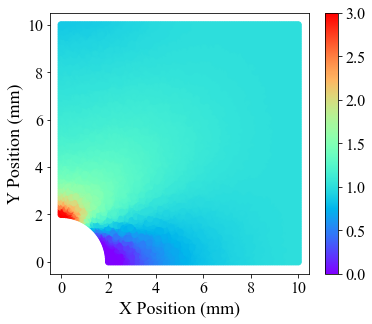

In [169]:
plt.rcParams['font.family'] = 'Times New Roman'
fig, ax = plt.subplots(figsize=(5.8, 4.8)) 
surf = ax.scatter(df['X'], df['Y'], c = df0['Sig_x'], vmin=0, vmax=3.0, cmap=cm.rainbow)
#cbar = fig.colorbar(ax)
cb = fig.colorbar(surf)
cb.ax.locator_params(nbins=7)
cb.ax.tick_params(labelsize=16)
#cb.set_label(label =r'$\sigma_xx (MPa)$', fontsize=16)
#cb.set_label(fontsize=16)
ax.axis('equal')
ax.set_xlabel('X Position (mm)', fontsize=18)
ax.set_ylabel('Y Position (mm)', fontsize=18)
#plt.yticks(ticks=[-10, -5, 0, 5, 10])
for tick in ax.get_xticklabels():
    #tick.set_fontname('Times New Roman')
    tick.set_fontsize(16)
for tick in ax.get_yticklabels():
    #tick.set_fontname('Times New Roman')
    tick.set_fontsize(16)
#plt.savefig('CH-3-Hole-Stress-FE.png', dpi=600, transparent=True)
plt.show()

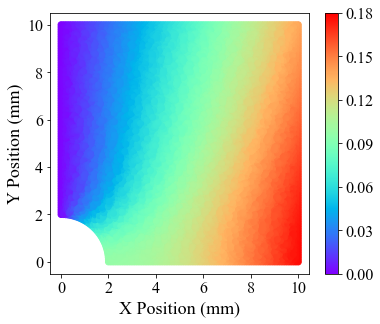

In [173]:
plt.rcParams['font.family'] = 'Times New Roman'
fig, ax = plt.subplots(figsize=(5.8, 4.8)) 
surf = ax.scatter(df['X'], df['Y'], c = df0['U'], vmin=0, vmax=0.18, cmap=cm.rainbow)
#cbar = fig.colorbar(ax)
cb = fig.colorbar(surf, ticks=[0,0.03,0.06,0.09,0.12,0.15,0.18])
cb.ax.locator_params(nbins=7)
cb.ax.tick_params(labelsize=16)
#cb.set_label(label =r'$\sigma_xx (MPa)$', fontsize=16)
#cb.set_label(fontsize=16)
ax.axis('equal')
ax.set_xlabel('X Position (mm)', fontsize=18)
ax.set_ylabel('Y Position (mm)', fontsize=18)
#plt.yticks(ticks=[-10, -5, 0, 5, 10])
for tick in ax.get_xticklabels():
    #tick.set_fontname('Times New Roman')
    tick.set_fontsize(16)
for tick in ax.get_yticklabels():
    #tick.set_fontname('Times New Roman')
    tick.set_fontsize(16)
plt.savefig('CH-U-PDE-5-5.png', dpi=600, transparent=True)
plt.show()

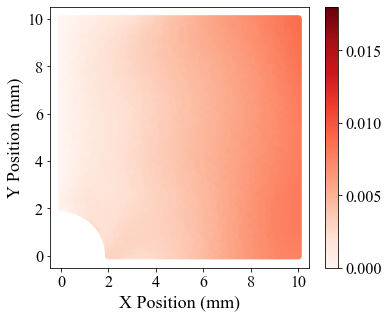

In [187]:
plt.rcParams['font.family'] = 'Times New Roman'
fig, ax = plt.subplots(figsize=(5.8, 4.8)) 
#surf = ax.scatter(df['X'], df['Y'], c = df['Sig_x'], vmin=0, vmax=6.0, cmap=cm.rainbow)
surf = ax.scatter(df['X'], df['Y'], c = abs(df['U'] - df0['U']), vmin=0, vmax=0.018, cmap=cm.Reds)
#cbar = fig.colorbar(ax)
cb = fig.colorbar(surf)
cb.ax.locator_params(nbins=7)
cb.ax.tick_params(labelsize=16)
#cb.set_label(label =r'$\sigma_xx (MPa)$', fontsize=16)
#cb.set_label(fontsize=16)
ax.axis('equal')
ax.set_xlabel('X Position (mm)', fontsize=18)
ax.set_ylabel('Y Position (mm)', fontsize=18)
for tick in ax.get_xticklabels():
    #tick.set_fontname('Times New Roman')
    tick.set_fontsize(16)
for tick in ax.get_yticklabels():
    #tick.set_fontname('Times New Roman')
    tick.set_fontsize(16)
#plt.savefig('CH-R2-S-Error-PDE.png', dpi=600, transparent=True)
plt.show()